<a href="https://colab.research.google.com/github/widyadaridhyp/Spatial-Analysis/blob/main/Tugas_1_TK_Spasial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --no-cache-dir libpysal as ps
import pandas as pd
import numpy as np
!pip install --no-cache-dir pointpats
import pointpats
from pointpats import PoissonPointProcess as csr
from pointpats import ripley
from pointpats import *
import pointpats.quadrat_statistics as qs
import matplotlib.pyplot as plt
from skimage import io
!pip install geopandas
import geopandas as gpd
import folium
import requests
from xml.etree import ElementTree
import scipy.spatial
import libpysal as ps
%matplotlib inline
from shapely.ops import *
from shapely.geometry import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 38.7 MB/s 
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 41.3 MB/s 
     |████████████████████████████████| 2.4 MB 62.3 MB/s 
  Created wheel for pointpats: filename=pointpats-2.2.0-py3-none-any.whl size=60835 sha256=0819336e16a47f956a7e1cb80dcfcf9b4f77ffcd8eae9b4576987773842739cb
  Stored in directory: /tmp/pip-ephem-wheel-cache-2pxd3gcw/wheels/41/5f/91/08cc68af630fafdc6bed36128abf8e716e062256a8495fdb2d
Successfully built pointpats


/usr/local/lib/python3.7/dist-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 45.8 MB/s 
     |████████████████████████████████| 16.7 MB 66.0 MB/s 
     |████████████████████████████████| 6.3 MB 53.0 MB/s 


In [ ]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/widyadaridhyp/Spatial-Analysis/main/dinkes-od_15931_daftar_rumah_sakit_milik_pem__kabupatenkota_data.csv

--2022-09-21 11:27:01--  https://raw.githubusercontent.com/widyadaridhyp/Spatial-Analysis/main/dinkes-od_15931_daftar_rumah_sakit_milik_pem__kabupatenkota_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10862 (11K) [text/plain]
Saving to: ‘data/dinkes-od_15931_daftar_rumah_sakit_milik_pem__kabupatenkota_data.csv’

dinkes-od_15931_daf 100%[===================>]  10.61K  --.-KB/s    in 0s      

2022-09-21 11:27:01 (68.4 MB/s) - ‘data/dinkes-od_15931_daftar_rumah_sakit_milik_pem__kabupatenkota_data.csv’ saved [10862/10862]



In [ ]:
rs = pd.read_csv('data/dinkes-od_15931_daftar_rumah_sakit_milik_pem__kabupatenkota_data.csv')
rs

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,nama_rs,alamat,desa_kelurahan,kecamatan,telp_ppk,latitude,longitude,tahun
0,1,32,JAWA BARAT,3204,KABUPATEN BANDUNG,RSUD CICALENGKA,"JL. H. DARHAM CIKOPO NO.35, TENJOLAYA, KEC. CI...",TENJOLAYA,CICALENGKA,022-7952202,-6.982337,107.842052,2020
1,2,32,JAWA BARAT,3204,KABUPATEN BANDUNG,RSUD AL IHSAN,"JL. KI ASTRAMANGGALA, BALEENDAH, KEC. BALEENDA...",BALEENDAH,BALEENDAH,022-5940872,-7.007707,107.624064,2020
2,3,32,JAWA BARAT,3204,KABUPATEN BANDUNG,RSUD MAJALAYA,"JL. CIPAKU NO.87, CIPAKU, KEC. PASEH, BANDUNG,...",CIPAKU,PASEH,022-5950035,-7.049290,107.772000,2020
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,RSUD SOREANG,"JL. ALUN-ALUN UTARA NO.1, PAMEKARAN, KEC. SORE...",PAMEKARAN,SOREANG,022-5891355,-7.030000,108.000000,2020
4,5,32,JAWA BARAT,3217,KABUPATEN BANDUNG BARAT,RSUD CIKALONG WETAN,"JL. CIKALONG NO.290, CIPTAGUMATI, KEC. CIKALON...",CIPTAMUGATI,CIKALONG WETAN,022-86866016,-6.743744,107.444976,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,32,JAWA BARAT,3276,KOTA DEPOK,RSD KOTA DEPOK,"JL. RAYA MUCHTAR NO.99, SAWANGAN LAMA, KEC. SA...",SAWANGAN LAMA,SAWANGAN,0251-8602514,-6.395751,106.759009,2020
59,60,32,JAWA BARAT,3272,KOTA SUKABUMI,RSUD R. SAMSUDIN SH,JL. RUMAH SAKIT NO.1,CIKOLE,CIKOLE,0266-225180,-6.914882,106.934792,2020
60,61,32,JAWA BARAT,3272,KOTA SUKABUMI,RS BHAYANGKARA SETUKPA,JL. AMINTA AZMALI NO 59,SRIWIDARI,GUNUNGPUYUH,0266-229207,-6.912015,106.922600,2020
61,62,32,JAWA BARAT,3272,KOTA SUKABUMI,RSUD AL MULK,JL. PELABUHAN II KM 6,LEMBURSITU,LEMBURSITU,0266-6243088,-6.958535,106.897496,2020


In [ ]:
rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   63 non-null     int64  
 1   kode_provinsi        63 non-null     int64  
 2   nama_provinsi        63 non-null     object 
 3   kode_kabupaten_kota  63 non-null     int64  
 4   nama_kabupaten_kota  63 non-null     object 
 5   nama_rs              63 non-null     object 
 6   alamat               63 non-null     object 
 7   desa_kelurahan       62 non-null     object 
 8   kecamatan            62 non-null     object 
 9   telp_ppk             62 non-null     object 
 10  latitude             61 non-null     float64
 11  longitude            61 non-null     float64
 12  tahun                63 non-null     int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 6.5+ KB


In [ ]:
rs.isnull().values.any()

True

In [ ]:
rs.isnull().sum()

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
nama_rs                0
alamat                 0
desa_kelurahan         1
kecamatan              1
telp_ppk               1
latitude               2
longitude              2
tahun                  0
dtype: int64

In [ ]:
rs = rs.dropna(axis = 0)
rs

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,nama_rs,alamat,desa_kelurahan,kecamatan,telp_ppk,latitude,longitude,tahun
0,1,32,JAWA BARAT,3204,KABUPATEN BANDUNG,RSUD CICALENGKA,"JL. H. DARHAM CIKOPO NO.35, TENJOLAYA, KEC. CI...",TENJOLAYA,CICALENGKA,022-7952202,-6.982337,107.842052,2020
1,2,32,JAWA BARAT,3204,KABUPATEN BANDUNG,RSUD AL IHSAN,"JL. KI ASTRAMANGGALA, BALEENDAH, KEC. BALEENDA...",BALEENDAH,BALEENDAH,022-5940872,-7.007707,107.624064,2020
2,3,32,JAWA BARAT,3204,KABUPATEN BANDUNG,RSUD MAJALAYA,"JL. CIPAKU NO.87, CIPAKU, KEC. PASEH, BANDUNG,...",CIPAKU,PASEH,022-5950035,-7.049290,107.772000,2020
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,RSUD SOREANG,"JL. ALUN-ALUN UTARA NO.1, PAMEKARAN, KEC. SORE...",PAMEKARAN,SOREANG,022-5891355,-7.030000,108.000000,2020
4,5,32,JAWA BARAT,3217,KABUPATEN BANDUNG BARAT,RSUD CIKALONG WETAN,"JL. CIKALONG NO.290, CIPTAGUMATI, KEC. CIKALON...",CIPTAMUGATI,CIKALONG WETAN,022-86866016,-6.743744,107.444976,2020
5,6,32,JAWA BARAT,3217,KABUPATEN BANDUNG BARAT,RSUD LEMBANG,"JL. RAYA LEMBANG KM 11,4 NO. 11, GUDANGKAHURIP...",GUDANGKAAHURIPAN,LEMBANG,022-2786879,-6.838210,107.598325,2020
6,7,32,JAWA BARAT,3217,KABUPATEN BANDUNG BARAT,RSJ PROVINSI JAWA BARAT,"JL. KOLONEL MASTURI NO.KM.7, JAMBUDIPA, KEC. C...",JAMBUDIPA,CISARUA,022-2700260,-6.809015,107.563111,2020
7,8,32,JAWA BARAT,3217,KABUPATEN BANDUNG BARAT,RSUD CILILIN,"JL. CINTAKARYA, CILILIN, KABUPATEN BANDUNG BAR...",CINTAKARYA,CILILIN,022-6941600,-6.943538,107.459616,2020
8,9,32,JAWA BARAT,3216,KABUPATEN BEKASI,RSUD KABUPATEN BEKASI,"JL. RAYA TEUKU UMAR NO.202, WANASARI, KEC. CIB...",WANASARI,CIBITUNG,021-88374444,-6.270000,107.000000,2020
9,10,32,JAWA BARAT,3216,KABUPATEN BEKASI,RSUD CABANGBUNGIN,DESA JAYALAKSANA KECAMATAN CABANG BUNGIN KABUP...,JAYALAKSANA,CABANGBUNGIN,0857-1767-8889,-6.100000,107.000000,2020


# Quadrats Statistics

In [ ]:
dir(qs)

['HexagonM',
 'PointPattern',
 'QStatistic',
 'RectangleM',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'math',
 'np',
 'plt',
 'scipy']

In [ ]:
len(rs)

60

In [ ]:
rsxy = rs['latitude'],rs['longitude']

In [ ]:
rsxy = np.array(rsxy)
rsxy

array([[ -6.98233728,  -7.00770719,  -7.04929   ,  -7.03      ,
         -6.74374444,  -6.83820952,  -6.80901504,  -6.94353815,
         -6.27      ,  -6.1       ,  -6.57      ,  -6.47      ,
         -6.66      ,  -6.5       ,  -6.43      ,  -7.34      ,
         -6.72033255,  -6.810525  ,  -7.21435837,  -6.91304   ,
         -6.797155  ,  -7.22540946,  -7.22540946,  -7.213105  ,
         -7.224907  ,  -6.39554   ,  -6.33021   ,  -6.31432086,
         -6.320752  ,  -6.885481  ,  -6.984283  ,  -6.760698  ,
         -6.833815  ,  -6.523261  ,  -6.558127  ,  -6.89662   ,
         -7.252668  ,  -6.98904   ,  -6.857049  ,  -7.358758  ,
         -6.929171  ,  -6.86468   ,  -6.90017   ,  -6.91541   ,
         -7.368493  ,  -6.270428  ,  -6.55745   ,  -6.58041   ,
         -6.591099  ,  -6.98412   ,  -6.87924083,  -6.74305773,
         -6.73077263,  -6.408297  ,  -6.401612  ,  -6.395751  ,
         -6.914882  ,  -6.91201468,  -6.958535  ,  -7.33234718],
       [107.84205244, 107.62406381, 107

In [ ]:
rsxy=rsxy.transpose()
rsxy

array([[ -6.98233728, 107.84205244],
       [ -7.00770719, 107.62406381],
       [ -7.04929   , 107.772     ],
       [ -7.03      , 108.        ],
       [ -6.74374444, 107.44497608],
       [ -6.83820952, 107.59832543],
       [ -6.80901504, 107.56311146],
       [ -6.94353815, 107.45961595],
       [ -6.27      , 107.        ],
       [ -6.1       , 107.        ],
       [ -6.57      , 107.        ],
       [ -6.47      , 107.        ],
       [ -6.66      , 107.        ],
       [ -6.5       , 107.        ],
       [ -6.43      , 107.        ],
       [ -7.34      , 108.        ],
       [ -6.72033255, 107.03253716],
       [ -6.810525  , 107.141066  ],
       [ -7.21435837, 107.13943144],
       [ -6.91304   , 108.719     ],
       [ -6.797155  , 108.475501  ],
       [ -7.22540946, 107.91124066],
       [ -7.22540946, 107.91124066],
       [ -7.213105  , 107.920109  ],
       [ -7.224907  , 107.911382  ],
       [ -6.39554   , 108.156     ],
       [ -6.33021   , 108.32      ],
 

In [ ]:
pp_rs = PointPattern(rsxy)
pp_rs

In [ ]:
pp_rs.summary()

Point Pattern
60 points
Bounding rectangle [(-7.368493,106.557929), (-6.1,108.719)]
Area of window: 2.7413034360029904
Intensity estimate for window: 21.8873982398257
          x           y
0 -6.982337  107.842052
1 -7.007707  107.624064
2 -7.049290  107.772000
3 -7.030000  108.000000
4 -6.743744  107.444976


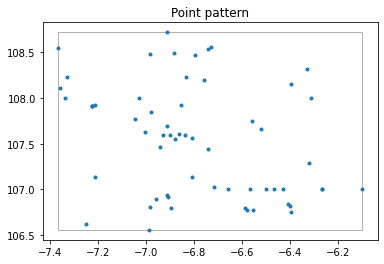

In [ ]:
pp_rs.plot(window= True, title= "Point pattern")

In [ ]:
q_r = qs.QStatistic(pp_rs,shape= "rectangle",nx = 3, ny = 3)

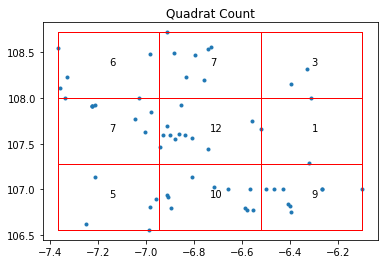

In [ ]:
q_r.plot()

In [ ]:
bbox = ((rs.longitude.min(), rs.longitude.max(),
         rs.latitude.min(), rs.latitude.max()))
bbox

(106.557929, 108.719, -7.368493, -6.1)

In [ ]:
jabar = io.imread("https://github.com/widyadaridhyp/Spatial-Analysis/blob/main/jabar.jpg?raw=true")
jabar

array([[[255, 241, 255],
        [255, 245, 252],
        [255, 253, 234],
        ...,
        [248, 254, 254],
        [244, 252, 254],
        [246, 251, 255]],

       [[255, 240, 255],
        [255, 252, 255],
        [255, 254, 242],
        ...,
        [249, 255, 255],
        [245, 253, 255],
        [246, 250, 253]],

       [[255, 245, 249],
        [255, 252, 252],
        [252, 254, 251],
        ...,
        [250, 254, 255],
        [249, 253, 254],
        [252, 253, 255]],

       ...,

       [[251, 251, 255],
        [248, 248, 255],
        [255, 254, 255],
        ...,
        [249, 250, 254],
        [251, 252, 255],
        [252, 253, 255]],

       [[255, 247, 255],
        [253, 245, 255],
        [251, 246, 253],
        ...,
        [254, 249, 255],
        [254, 249, 255],
        [254, 249, 255]],

       [[255, 246, 251],
        [255, 249, 254],
        [251, 250, 255],
        ...,
        [254, 249, 255],
        [254, 249, 255],
        [254, 249, 255]]

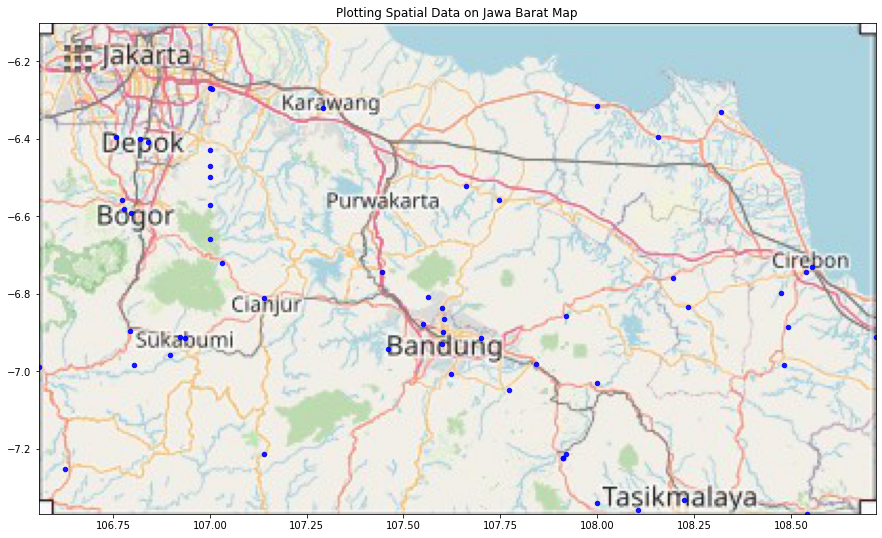

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(rs.longitude, rs.latitude, zorder=1, alpha= 0.9, c='b', s=20)
ax.set_title('Plotting Spatial Data on Jawa Barat Map')
ax.set_xlim(106.557929,108.719)
ax.set_ylim(-7.368493,-6.1)
ax.imshow(jabar, zorder=0, extent = bbox, aspect= 'equal')

In [ ]:
q_r.chi2

14.100000000000001

In [ ]:
q_r.df

8

In [ ]:
q_r.chi2_pvalue

0.07919590155474475

In [ ]:
csr_process = csr(pp_rs.window, pp_rs.n, 999, asPP=True)

In [ ]:
q_r_e = qs.QStatistic(pp_rs, shape='rectangle', nx=3, ny=3, realizations=csr_process)

In [ ]:
q_r_e.chi2_r_pvalue

0.064

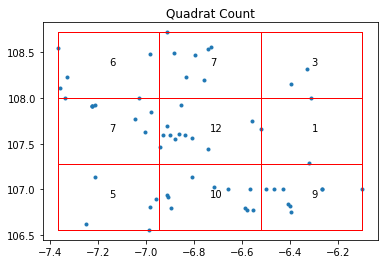

In [ ]:
q_r_e.plot()

# Nearest Neighbor

In [ ]:
dir(pointpats)

['HexagonM',
 'PointPattern',
 'PointProcess',
 'PoissonClusterPointProcess',
 'PoissonPointProcess',
 'QStatistic',
 'RectangleM',
 'SpaceTimeEvents',
 'Window',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_circle',
 '_deprecated_distance_statistics',
 'as_window',
 'centrography',
 'distance_statistics',
 'dtot',
 'ellipse',
 'euclidean_median',
 'f',
 'f_test',
 'g',
 'g_test',
 'geometry',
 'hull',
 'j',
 'j_test',
 'jacquez',
 'k',
 'k_test',
 'knox',
 'l',
 'l_test',
 'manhattan_median',
 'mantel',
 'mbr',
 'mean_center',
 'minimum_bounding_rectangle',
 'minimum_rotated_rectangle',
 'modified_knox',
 'pointpattern',
 'poly_from_bbox',
 'process',
 'quadrat_statistics',
 'random',
 'ripley',
 'skyum',
 'spacetime',
 'std_distance',
 'to_ccf',
 'util',
 'weighted_mean_center',
 'window']

In [ ]:
rs

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,nama_rs,alamat,desa_kelurahan,kecamatan,telp_ppk,latitude,longitude,tahun
0,1,32,JAWA BARAT,3204,KABUPATEN BANDUNG,RSUD CICALENGKA,"JL. H. DARHAM CIKOPO NO.35, TENJOLAYA, KEC. CI...",TENJOLAYA,CICALENGKA,022-7952202,-6.982337,107.842052,2020
1,2,32,JAWA BARAT,3204,KABUPATEN BANDUNG,RSUD AL IHSAN,"JL. KI ASTRAMANGGALA, BALEENDAH, KEC. BALEENDA...",BALEENDAH,BALEENDAH,022-5940872,-7.007707,107.624064,2020
2,3,32,JAWA BARAT,3204,KABUPATEN BANDUNG,RSUD MAJALAYA,"JL. CIPAKU NO.87, CIPAKU, KEC. PASEH, BANDUNG,...",CIPAKU,PASEH,022-5950035,-7.049290,107.772000,2020
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,RSUD SOREANG,"JL. ALUN-ALUN UTARA NO.1, PAMEKARAN, KEC. SORE...",PAMEKARAN,SOREANG,022-5891355,-7.030000,108.000000,2020
4,5,32,JAWA BARAT,3217,KABUPATEN BANDUNG BARAT,RSUD CIKALONG WETAN,"JL. CIKALONG NO.290, CIPTAGUMATI, KEC. CIKALON...",CIPTAMUGATI,CIKALONG WETAN,022-86866016,-6.743744,107.444976,2020
5,6,32,JAWA BARAT,3217,KABUPATEN BANDUNG BARAT,RSUD LEMBANG,"JL. RAYA LEMBANG KM 11,4 NO. 11, GUDANGKAHURIP...",GUDANGKAAHURIPAN,LEMBANG,022-2786879,-6.838210,107.598325,2020
6,7,32,JAWA BARAT,3217,KABUPATEN BANDUNG BARAT,RSJ PROVINSI JAWA BARAT,"JL. KOLONEL MASTURI NO.KM.7, JAMBUDIPA, KEC. C...",JAMBUDIPA,CISARUA,022-2700260,-6.809015,107.563111,2020
7,8,32,JAWA BARAT,3217,KABUPATEN BANDUNG BARAT,RSUD CILILIN,"JL. CINTAKARYA, CILILIN, KABUPATEN BANDUNG BAR...",CINTAKARYA,CILILIN,022-6941600,-6.943538,107.459616,2020
8,9,32,JAWA BARAT,3216,KABUPATEN BEKASI,RSUD KABUPATEN BEKASI,"JL. RAYA TEUKU UMAR NO.202, WANASARI, KEC. CIB...",WANASARI,CIBITUNG,021-88374444,-6.270000,107.000000,2020
9,10,32,JAWA BARAT,3216,KABUPATEN BEKASI,RSUD CABANGBUNGIN,DESA JAYALAKSANA KECAMATAN CABANG BUNGIN KABUP...,JAYALAKSANA,CABANGBUNGIN,0857-1767-8889,-6.100000,107.000000,2020


In [ ]:
rs.drop(rs.iloc[:,12:13],axis=1,inplace=True)
rs.drop(rs.iloc[:,1:5],axis=1,inplace=True)
rs.drop(rs.iloc[:,2:6],axis=1,inplace=True)
rs

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,nama_rs,latitude,longitude
0,1,RSUD CICALENGKA,-6.982337,107.842052
1,2,RSUD AL IHSAN,-7.007707,107.624064
2,3,RSUD MAJALAYA,-7.049290,107.772000
3,4,RSUD SOREANG,-7.030000,108.000000
4,5,RSUD CIKALONG WETAN,-6.743744,107.444976
5,6,RSUD LEMBANG,-6.838210,107.598325
6,7,RSJ PROVINSI JAWA BARAT,-6.809015,107.563111
7,8,RSUD CILILIN,-6.943538,107.459616
8,9,RSUD KABUPATEN BEKASI,-6.270000,107.000000
9,10,RSUD CABANGBUNGIN,-6.100000,107.000000


In [ ]:
!mkdir
!!wget -P data/ https://raw.githubusercontent.com/widyadaridhyp/Spatial-Analysis/main/diskominfo-od_kode_wilayah_dan_nama_wilayah_kota_kabupaten_data.csv

mkdir: missing operand
Try 'mkdir --help' for more information.


['--2022-09-21 07:54:33--  https://raw.githubusercontent.com/widyadaridhyp/Spatial-Analysis/main/diskominfo-od_kode_wilayah_dan_nama_wilayah_kota_kabupaten_data.csv',
 'Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...',
 'Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 3083 (3.0K) [text/plain]',
 'Saving to: ‘data/diskominfo-od_kode_wilayah_dan_nama_wilayah_kota_kabupaten_data.csv’',
 '',
 '',
 '          diskominf   0%[                    ]       0  --.-KB/s               ',
 'diskominfo-od_kode_ 100%[===================>]   3.01K  --.-KB/s    in 0s      ',
 '',
 '2022-09-21 07:54:33 (36.5 MB/s) - ‘data/diskominfo-od_kode_wilayah_dan_nama_wilayah_kota_kabupaten_data.csv’ saved [3083/3083]',
 '']

In [ ]:
bps = pd.read_csv('data/diskominfo-od_kode_wilayah_dan_nama_wilayah_kota_kabupaten_data.csv')
bps

,id,kemendagri_provinsi_kode,kemendagri_kota_kode,kemendagri_provinsi_nama,kemendagri_kota_nama,bps_provinsi_kode,bps_kota_kode,bps_provinsi_nama,bps_kota_nama,latitude,longitude,kode_pos,status_adm
0,1,32,32.01,JAWA BARAT,KAB. BOGOR,32,3201,JAWA BARAT,KABUPATEN BOGOR,-6.479679,106.824965,16127.0,NaN
1,2,32,32.02,JAWA BARAT,KAB. SUKABUMI,32,3202,JAWA BARAT,KABUPATEN SUKABUMI,-6.915727,106.932576,17657.0,NaN
2,3,32,32.03,JAWA BARAT,KAB. CIANJUR,32,3203,JAWA BARAT,KABUPATEN CIANJUR,-6.822558,107.139542,40184.0,NaN
3,4,32,32.04,JAWA BARAT,KAB. BANDUNG,32,3204,JAWA BARAT,KABUPATEN BANDUNG,-7.012851,107.528627,40113.0,NaN
4,5,32,32.05,JAWA BARAT,KAB. GARUT,32,3205,JAWA BARAT,KABUPATEN GARUT,-7.202988,107.885592,44131.0,NaN
5,6,32,32.06,JAWA BARAT,KAB. TASIKMALAYA,32,3206,JAWA BARAT,KABUPATEN TASIKMALAYA,-7.361212,108.112488,17424.0,NaN
6,7,32,32.07,JAWA BARAT,KAB. CIAMIS,32,3207,JAWA BARAT,KABUPATEN CIAMIS,-7.325788,108.351400,40113.0,NaN
7,8,32,32.08,JAWA BARAT,KAB. KUNINGAN,32,3208,JAWA BARAT,KABUPATEN KUNINGAN,-6.976233,108.482982,40291.0,NaN
8,9,32,32.09,JAWA BARAT,KAB. CIREBON,32,3209,JAWA BARAT,KABUPATEN CIREBON,-6.764507,108.478858,45112.0,NaN
9,10,32,32.10,JAWA BARAT,KAB. MAJALENGKA,32,3210,JAWA BARAT,KABUPATEN MAJALENGKA,-6.836531,108.227876,45414.0,NaN


In [ ]:
bps.drop(bps.iloc[:,11:13],axis=1,inplace=True)
bps.dropna(axis=0,inplace=True)
bps.drop(bps.iloc[:,1:8],axis=1,inplace=True)
bps

,id,bps_kota_nama,latitude,longitude
0,1,KABUPATEN BOGOR,-6.479679,106.824965
1,2,KABUPATEN SUKABUMI,-6.915727,106.932576
2,3,KABUPATEN CIANJUR,-6.822558,107.139542
3,4,KABUPATEN BANDUNG,-7.012851,107.528627
4,5,KABUPATEN GARUT,-7.202988,107.885592
5,6,KABUPATEN TASIKMALAYA,-7.361212,108.112488
6,7,KABUPATEN CIAMIS,-7.325788,108.351400
7,8,KABUPATEN KUNINGAN,-6.976233,108.482982
8,9,KABUPATEN CIREBON,-6.764507,108.478858
9,10,KABUPATEN MAJALENGKA,-6.836531,108.227876


In [ ]:
def create_gdf(df, x='latitude', y='longitude'):
    return gpd.GeoDataFrame(df, 
    geometry=gpd.points_from_xy(df[y], df[x]), 
             crs={"init":"EPSG:4326"})

In [ ]:
rs_gdf = create_gdf(rs)
bps_gdf = create_gdf(bps)
rs_gdf

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,id,nama_rs,latitude,longitude,geometry
0,1,RSUD CICALENGKA,-6.982337,107.842052,POINT (107.84205 -6.98234)
1,2,RSUD AL IHSAN,-7.007707,107.624064,POINT (107.62406 -7.00771)
2,3,RSUD MAJALAYA,-7.049290,107.772000,POINT (107.77200 -7.04929)
3,4,RSUD SOREANG,-7.030000,108.000000,POINT (108.00000 -7.03000)
4,5,RSUD CIKALONG WETAN,-6.743744,107.444976,POINT (107.44498 -6.74374)
5,6,RSUD LEMBANG,-6.838210,107.598325,POINT (107.59833 -6.83821)
6,7,RSJ PROVINSI JAWA BARAT,-6.809015,107.563111,POINT (107.56311 -6.80902)
7,8,RSUD CILILIN,-6.943538,107.459616,POINT (107.45962 -6.94354)
8,9,RSUD KABUPATEN BEKASI,-6.270000,107.000000,POINT (107.00000 -6.27000)
9,10,RSUD CABANGBUNGIN,-6.100000,107.000000,POINT (107.00000 -6.10000)


In [ ]:
bps_gdf

,id,bps_kota_nama,latitude,longitude,geometry
0,1,KABUPATEN BOGOR,-6.479679,106.824965,POINT (106.82497 -6.47968)
1,2,KABUPATEN SUKABUMI,-6.915727,106.932576,POINT (106.93258 -6.91573)
2,3,KABUPATEN CIANJUR,-6.822558,107.139542,POINT (107.13954 -6.82256)
3,4,KABUPATEN BANDUNG,-7.012851,107.528627,POINT (107.52863 -7.01285)
4,5,KABUPATEN GARUT,-7.202988,107.885592,POINT (107.88559 -7.20299)
5,6,KABUPATEN TASIKMALAYA,-7.361212,108.112488,POINT (108.11249 -7.36121)
6,7,KABUPATEN CIAMIS,-7.325788,108.351400,POINT (108.35140 -7.32579)
7,8,KABUPATEN KUNINGAN,-6.976233,108.482982,POINT (108.48298 -6.97623)
8,9,KABUPATEN CIREBON,-6.764507,108.478858,POINT (108.47886 -6.76451)
9,10,KABUPATEN MAJALENGKA,-6.836531,108.227876,POINT (108.22788 -6.83653)


In [ ]:
rs.latitude.mean()

-6.799777456518297

In [ ]:
rs.longitude.mean()

107.53844157964616

In [ ]:
m = folium.Map([-6.799777456518297, 107.53844157964616])

In [ ]:
locs_rs = zip(rs_gdf.latitude, rs_gdf.longitude)
locs_bps = zip(bps_gdf.latitude, bps_gdf.longitude)

In [ ]:
for location in locs_rs:
    folium.CircleMarker(location=location, 
        color='red',   radius=4).add_to(m)

m

In [ ]:
for location in locs_bps:
    folium.CircleMarker(location=location, 
        color='purple',   radius=4).add_to(m)


m

In [ ]:
def calculate_nearest(row, destination, val, col='geometry'):
    # 1 - create unary union    
    dest_unary = destination['geometry'].unary_union
    # 2 - find closest point
    nearest_geom = nearest_points(row[col], dest_unary)
    # 3 - Find the corresponding geom
    match_geom = destination.loc[destination.geometry 
                == nearest_geom[1]]
    # 4 - get the corresponding value
    match_value = match_geom[val].to_numpy()[0]
    return match_value

In [ ]:
# Get the nearest geometry
bps_gdf['nearest_geom'] = bps_gdf.apply(calculate_nearest, destination=rs_gdf, val='geometry', axis=1)
# Get the nearest hospital name
bps_gdf['nearest_hospital'] = bps_gdf.apply(calculate_nearest, destination=rs_gdf, val='nama_rs', axis=1)
bps_gdf

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,id,bps_kota_nama,latitude,longitude,geometry,nearest_geom,nearest_hospital
0,1,KABUPATEN BOGOR,-6.479679,106.824965,POINT (106.82497 -6.47968),POINT (106.840549 -6.408297),RSU HASANAH GRAHA AFIAH
1,2,KABUPATEN SUKABUMI,-6.915727,106.932576,POINT (106.93258 -6.91573),POINT (106.934792 -6.914882),RSUD R. SAMSUDIN SH
2,3,KABUPATEN CIANJUR,-6.822558,107.139542,POINT (107.13954 -6.82256),POINT (107.141066 -6.810525),RSUD SAYANG KAB CIANJUR
3,4,KABUPATEN BANDUNG,-7.012851,107.528627,POINT (107.52863 -7.01285),POINT (107.62406381021 -7.0077071888823),RSUD AL IHSAN
4,5,KABUPATEN GARUT,-7.202988,107.885592,POINT (107.88559 -7.20299),POINT (107.911382 -7.224907),RS UMUM TK IV GUNTUR
5,6,KABUPATEN TASIKMALAYA,-7.361212,108.112488,POINT (108.11249 -7.36121),POINT (108.106736 -7.358758),RSUD SINGAPARNA MEDIKA CITRAUTAMA (SMC)
6,7,KABUPATEN CIAMIS,-7.325788,108.351400,POINT (108.35140 -7.32579),POINT (108.2252902 -7.33234718),RSUD DR. SOEKARDJO
7,8,KABUPATEN KUNINGAN,-6.976233,108.482982,POINT (108.48298 -6.97623),POINT (108.481617 -6.984283),RSUD 45 KUNINGAN
8,9,KABUPATEN CIREBON,-6.764507,108.478858,POINT (108.47886 -6.76451),POINT (108.475501 -6.797155),RS PARU PROVINSI JAWA BARAT
9,10,KABUPATEN MAJALENGKA,-6.836531,108.227876,POINT (108.22788 -6.83653),POINT (108.233428 -6.833815),RSUD KABUPATEN MAJALENGKA


In [ ]:
# Create LineString Geometry
bps_gdf['line'] = bps_gdf.apply(lambda row: LineString([row['geometry'], row['nearest_geom']]), axis=1)
# Create Line Geodataframe
line_gdf = bps_gdf[["id", "nearest_hospital", "line"]].set_geometry('line')
# Set the Coordinate reference
line_gdf.crs = crs={"init":"epsg:4326"}

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
for location in locs_rs:
    folium.CircleMarker(location=location, 
              color='red',  radius=8).add_to(m)
for location in locs_bps:
    folium.CircleMarker(location=location, 
              color='white', radius=4).add_to(m)

folium.GeoJson(line_gdf).add_to(m)
m.save('map2.html')
m

In [ ]:
coordinates = rs[['latitude','longitude']].values

## G Function

In [ ]:
g_test = ripley.g_test(coordinates)

In [ ]:
g_test.support

array([0.        , 0.01853186, 0.03706372, 0.05559558, 0.07412744,
       0.0926593 , 0.11119116, 0.12972302, 0.14825488, 0.16678673,
       0.18531859, 0.20385045, 0.22238231, 0.24091417, 0.25944603,
       0.27797789, 0.29650975, 0.31504161, 0.33357347, 0.35210533])

In [ ]:
g_test.statistic

array([0.        , 0.13333333, 0.35      , 0.41666667, 0.48333333,
       0.63333333, 0.73333333, 0.76666667, 0.81666667, 0.83333333,
       0.9       , 0.9       , 0.9       , 0.91666667, 0.93333333,
       0.95      , 0.96666667, 0.96666667, 0.98333333, 1.        ])

In [ ]:
g_test.pvalue

array([0.000e+00, 3.500e-03, 1.000e-04, 1.200e-03, 1.220e-02, 5.100e-03,
       8.500e-03, 5.960e-02, 1.505e-01, 4.567e-01, 3.454e-01, 2.638e-01,
       5.580e-02, 2.610e-02, 1.640e-02, 1.600e-02, 2.480e-02, 6.600e-03,
       2.220e-02, 0.000e+00])

In [ ]:
g_test.simulations

In [ ]:
g_test = ripley.g_test(coordinates, support=10, keep_simulations=True)

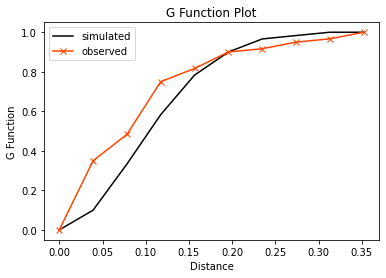

In [ ]:
plt.plot(g_test.support, np.median(g_test.simulations, axis=0), 
         color='k', label='simulated')
plt.plot(g_test.support, g_test.statistic, 
         marker='x', color='orangered', label='observed')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('G Function')
plt.title('G Function Plot')
plt.show()

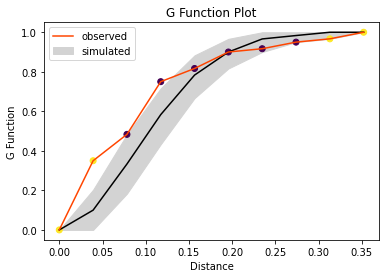

In [ ]:
#the middle 95% of simulations using numpy:
middle_95pct = np.percentile(g_test.simulations, q=(2.5, 97.5), axis=0)
# use the fill_between function to color between the 2.5% and 97.5% envelope
plt.fill_between(g_test.support, *middle_95pct, 
                 color='lightgrey', label='simulated')
plt.plot(g_test.support, np.median(g_test.simulations, axis=0), 
         color='k')
# plot the line for the observed value of G(d)
plt.plot(g_test.support, g_test.statistic, 
         color='orangered', label='observed')
# and plot the support points depending on whether their p-value is smaller than .05
plt.scatter(g_test.support, g_test.statistic, 
            cmap='viridis', c=g_test.pvalue < .01)
plt.legend()
plt.xlabel('Distance')
plt.ylabel('G Function')
plt.title('G Function Plot')
plt.show()

In [ ]:
ripley.g_function(coordinates)

(array([0.        , 0.01853186, 0.03706372, 0.05559558, 0.07412744,
        0.0926593 , 0.11119116, 0.12972302, 0.14825488, 0.16678673,
        0.18531859, 0.20385045, 0.22238231, 0.24091417, 0.25944603,
        0.27797789, 0.29650975, 0.31504161, 0.33357347, 0.35210533]),
 array([0.        , 0.13333333, 0.35      , 0.41666667, 0.48333333,
        0.63333333, 0.73333333, 0.76666667, 0.81666667, 0.83333333,
        0.9       , 0.9       , 0.9       , 0.91666667, 0.93333333,
        0.95      , 0.96666667, 0.96666667, 0.98333333, 1.        ]))

## F Function

In [ ]:
f_test = ripley.f_test(coordinates, support = g_test.support, keep_simulations=True, hull='convex')

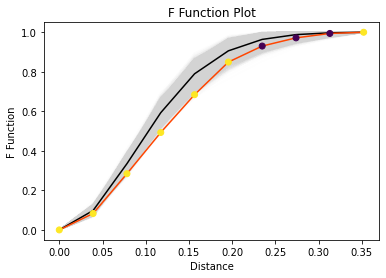

In [ ]:
plt.plot(f_test.support, f_test.simulations.T, alpha=.01, color='lightgrey')
plt.plot(f_test.support, np.median(f_test.simulations, axis=0), 
         color='k')
plt.plot(f_test.support, f_test.statistic, color='orangered')

plt.scatter(f_test.support, f_test.statistic, 
            cmap='viridis', c=f_test.pvalue < .05,
            zorder=4 # make sure they plot on top
           )

plt.xlabel('Distance')
plt.ylabel('F Function')
plt.title('F Function Plot')
plt.show()

## K Function

In [ ]:
k_test = ripley.k_test(coordinates, keep_simulations=True)

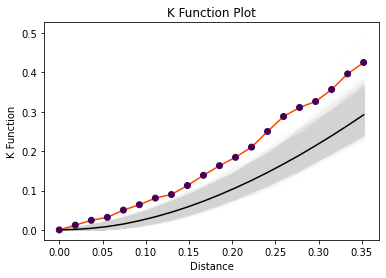

In [ ]:
plt.plot(k_test.support, k_test.simulations.T, color='lightgrey', alpha=.01)
plt.plot(k_test.support, k_test.statistic, color='orangered')
plt.plot(k_test.support, np.median(k_test.simulations, axis=0), 
         color='k')

plt.scatter(k_test.support, k_test.statistic, 
            cmap='viridis', c=k_test.pvalue < .05,
            zorder=4 # make sure they plot on top
           )

plt.xlabel('Distance')
plt.ylabel('K Function')
plt.title('K Function Plot')
plt.show()